In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


In [2]:
salary = pd.read_csv('/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# **EDA**

Text(0.5, 1.0, 'Salary Distribution')

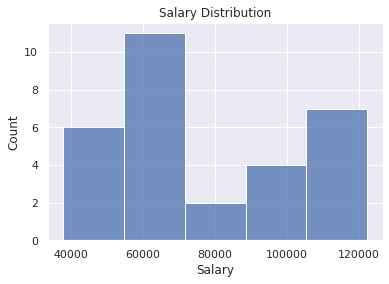

In [5]:
sns.histplot(salary['Salary'], bins = 5, )
plt.title('Salary Distribution')

Unique values of Dates

In [6]:
salary['YearsExperience'].unique()

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.7,  3.9,  4. ,
        4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,  7.9,  8.2,
        8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

# **Linear Regression**

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [8]:
X = salary.iloc[:,0].values.reshape(-1,1)

y = salary.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
lr = LinearRegression()

Model fit (training)

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

Model prediction

In [11]:
prediction = lr.predict(X_test)
pd.DataFrame({'Years Experience': list(X_test), 'Actual Salary': list(y_test), 'Predicted Salary': list(prediction)})

,Years Experience,Actual Salary,Predicted Salary
0,[5.3],83088.0,74821.415786
1,[7.1],98273.0,91385.436263
2,[3.9],63218.0,61938.288749
3,[6.0],93940.0,81262.979305
4,[4.5],61111.0,67459.628908
5,[6.8],91738.0,88624.766184
6,[9.5],116969.0,113470.796899
7,[2.0],43525.0,44454.044912
8,[8.7],109431.0,106109.010020


Model Evaluation Metrics

In [12]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 5146.886734888234
MSE: 39139215.99958858
RMSE: 6256.134269625979


Text(0.5, 0, 'Years of Experience')

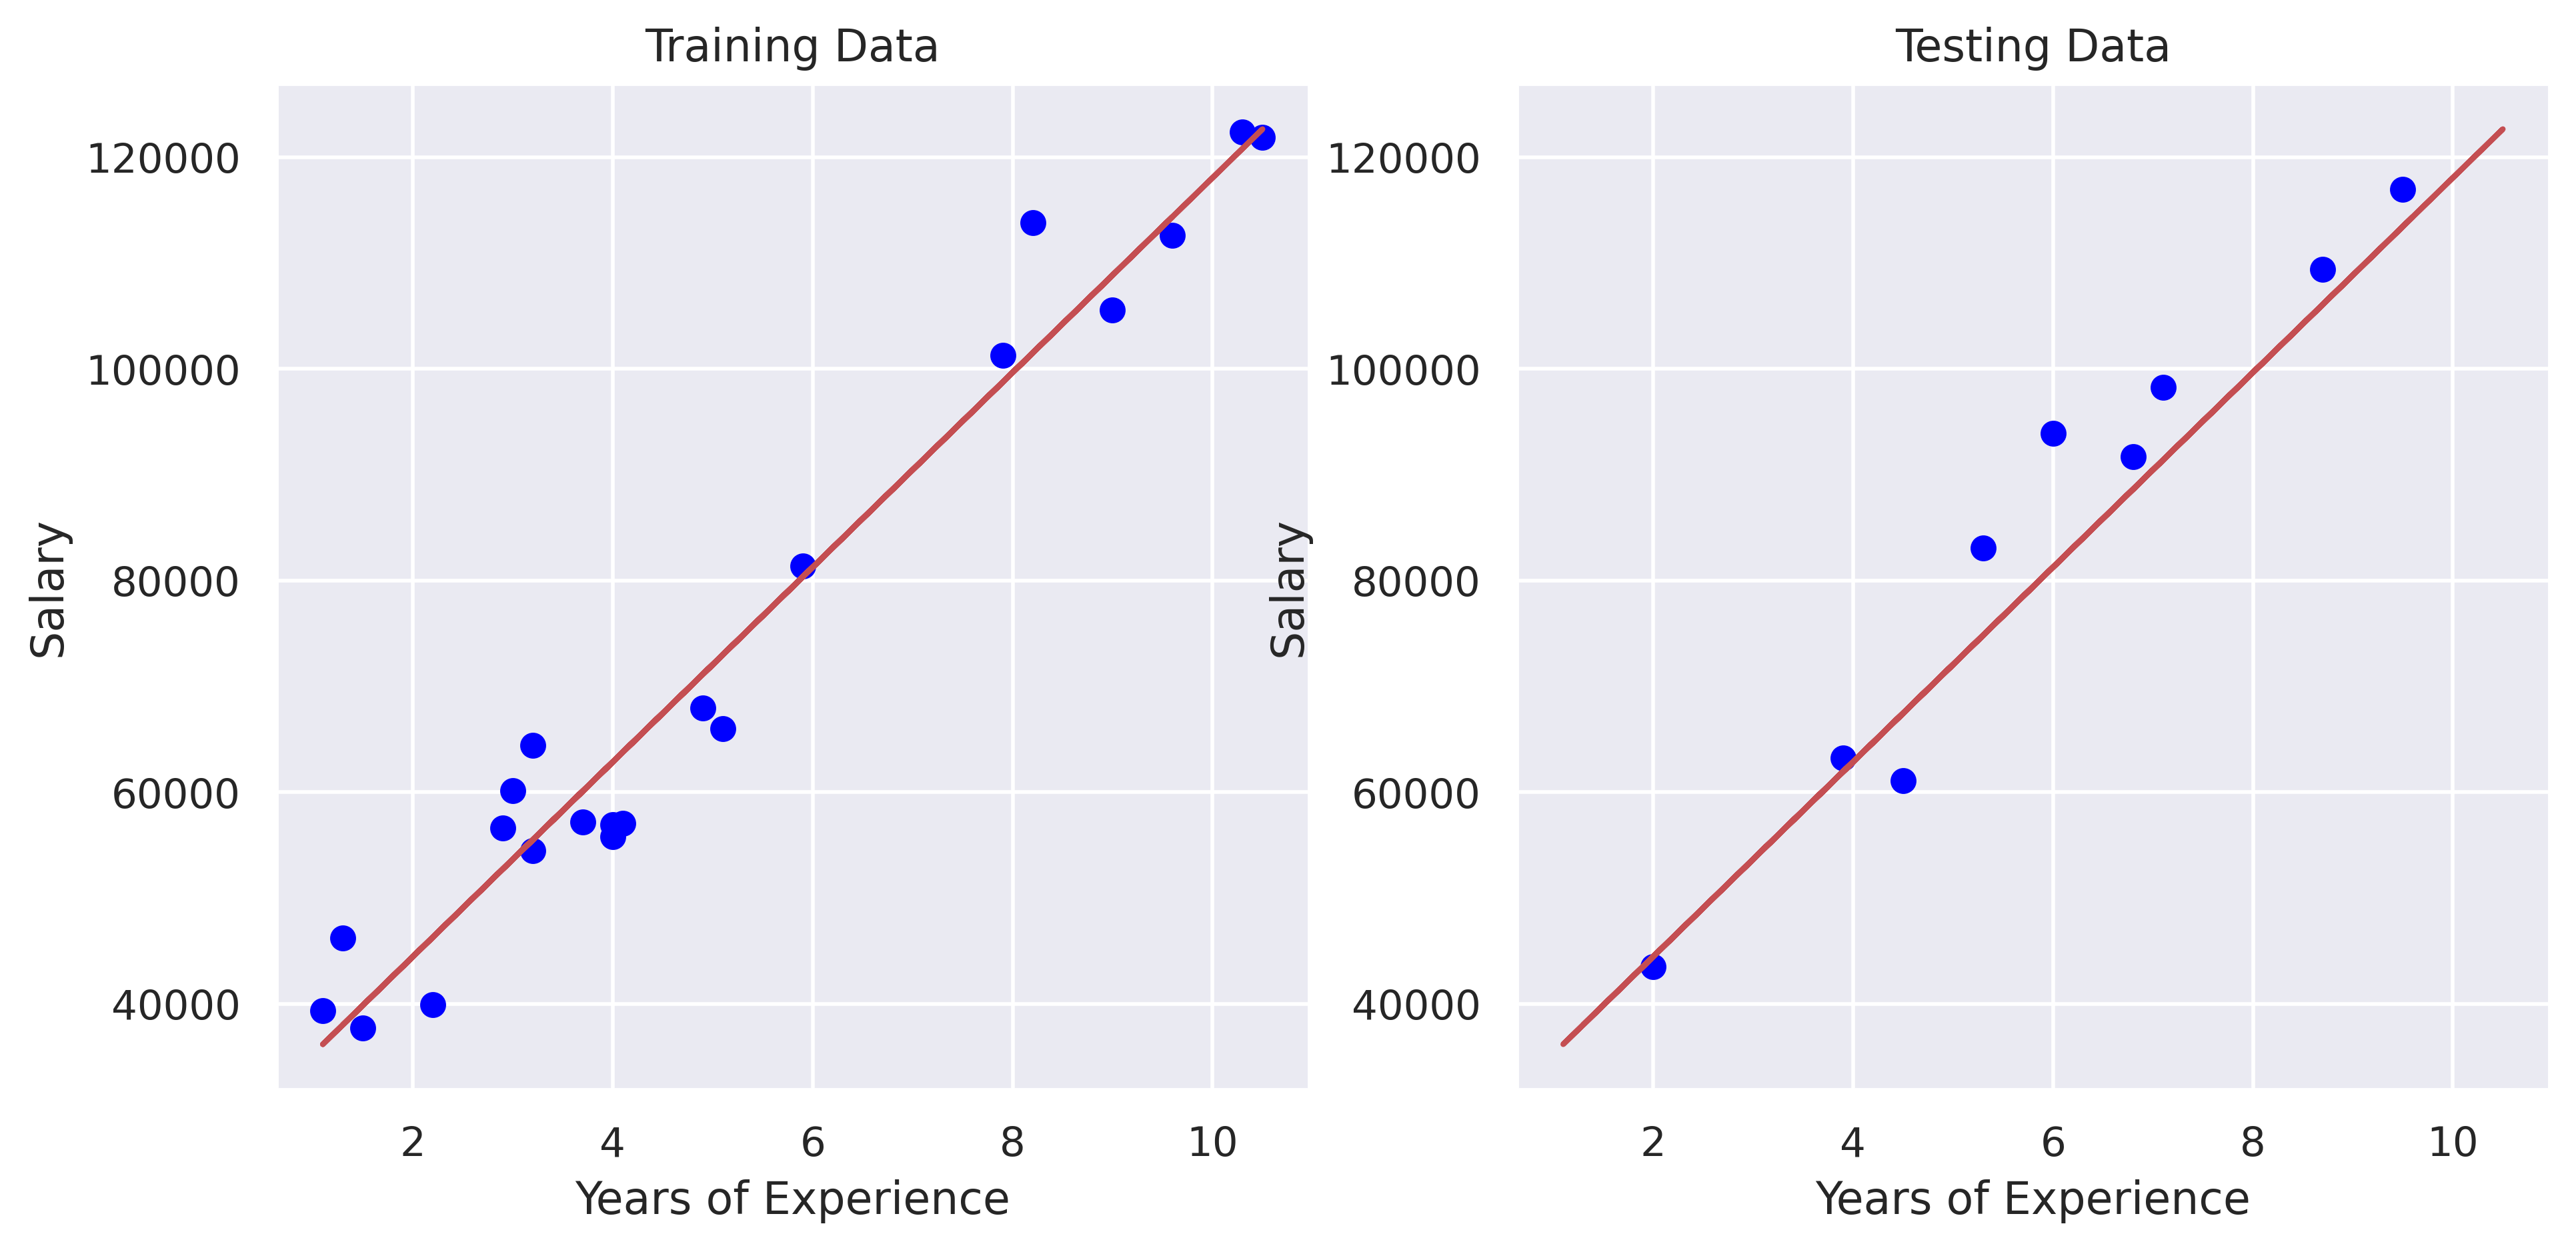

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (11,5), dpi = 400)

axes[0].scatter(X_train, y_train, color = 'blue')
axes[0].plot(X_train, lr.coef_*X_train + lr.intercept_, '-r')
axes[0].set_title('Training Data')
axes[0].set_ylabel("Salary")
axes[0].set_xlabel("Years of Experience")

axes[1].scatter(X_test, y_test, color = 'blue')
axes[1].plot(X_train, lr.coef_*X_train + lr.intercept_, '-r')
axes[1].set_title('Testing Data')
axes[1].set_ylabel("Salary")
axes[1].set_xlabel("Years of Experience")